In [25]:
import random
import bisect
import heapq
import copy

In [26]:
max_extra_nodes=3

In [27]:
list_of_primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]

# plain_text_set = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',' ']
# plain_text_set = ['a','b','c','d','e','f']
plain_text_set = ['s','c','d','r','e','u']

plain_text_set.append('#')  #Last element is used when the length of string is odd.

plain_text_set_size = len(plain_text_set)

mapping_elements = {}
for i in range(plain_text_set_size):
    mapping_elements[plain_text_set[i]] = i;
print(mapping_elements)

upper_tree_size = plain_text_set_size + random.randrange(max_extra_nodes) #atleast 25 nodes
lower_bound = list_of_primes[bisect.bisect(list_of_primes , upper_tree_size + plain_text_set_size + plain_text_set_size)]
lower_tree_size = lower_bound - plain_text_set_size - upper_tree_size #atleast 25 nodes

total_diamond_size = upper_tree_size+lower_tree_size+plain_text_set_size

print(plain_text_set_size,upper_tree_size,lower_tree_size)
print(total_diamond_size)

{'s': 0, 'c': 1, 'd': 2, 'r': 3, 'e': 4, 'u': 5, '#': 6}
7 7 9
23


In [28]:
vec = [i for i in range(total_diamond_size)]
print(vec)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


Taking first 26 values as the base line of the tree.
Thus for 0 to 25 are taken for 'a' to 'z'.

Then number **26** is taken as the root of the upper tree.
And then the from 26 to 26+upper_tree_size-1 are taken as nodes of the upper tree.

Then number **26 + upper_tree_size** is taken as the root of the lower tree.
And then the from 26 + upper_tree_size to total_diamond_size - 1 are taken as nodes of the lower tree.

Here for explanation we are taking 26 in place of plain_text_set_size.

In [29]:
root_of_upper_tree=plain_text_set_size
root_of_lower_tree=plain_text_set_size+upper_tree_size

**Constructing the Tree using Prüfer Sequence**

In [30]:
def Generate_Random_Tree(size_of_nodes):
    #Generating Prufer Sequence Randomly
    Prufer_sequence = []

    #taking n as the number of nodes in a tree;
    n = size_of_nodes


    for i in range(n-2):
        Prufer_sequence.append(random.randint(0, n-1))

    counter_of_nodes = [0 for i in range(n)]

    for node in Prufer_sequence:
        counter_of_nodes[node]+=1

    priority_queue = []

    for i in range(n):
        if(counter_of_nodes[i]==0):
            priority_queue.append(i);
        
    heapq.heapify(priority_queue)

    edges = []

    for i in range(n-2):
        smallest = heapq.heappop(priority_queue)
        edges.append([smallest,Prufer_sequence[-1]])
        counter_of_nodes[Prufer_sequence[-1]]-=1
        if(counter_of_nodes[Prufer_sequence[-1]]==0):
            heapq.heappush(priority_queue,Prufer_sequence[-1])
        Prufer_sequence.pop()

    smallest1=heapq.heappop(priority_queue)
    smallest2=heapq.heappop(priority_queue)
    edges.append([smallest1,smallest2])

    for i in range(n):
        counter_of_nodes[i]=0;
    
    for edge in edges:
        counter_of_nodes[edge[0]]+=1
        counter_of_nodes[edge[1]]+=1
    
    no_of_leaf_nodes=0;

    for i in range(1,n):
        if(counter_of_nodes[i]==1):
            no_of_leaf_nodes+=1;

    if(no_of_leaf_nodes>plain_text_set_size):       #happens in very rare case, so mostly it will not be called
        print("Bad Tree")
        return Generate_Random_Tree(size_of_nodes)

    print(edges)
    return edges

Creating Edges of both the trees (upper one and lower one)

In [31]:
Edges_in_upper_tree = Generate_Random_Tree(upper_tree_size)
Edges_in_lower_tree = Generate_Random_Tree(lower_tree_size)

Leaves_in_upper_tree = []
Leaves_in_lower_tree = []

adjacency_list_of_upper_tree = [[] for i in range(upper_tree_size)]
adjacency_list_of_lower_tree = [[] for i in range(lower_tree_size)]

for [edges,adj_lis] in [[Edges_in_upper_tree,adjacency_list_of_upper_tree],[Edges_in_lower_tree,adjacency_list_of_lower_tree]]:
    for ok in edges:
        adj_lis[ok[0]].append(ok[1])
        adj_lis[ok[1]].append(ok[0])

print(adjacency_list_of_upper_tree)
print(adjacency_list_of_lower_tree)

[[0, 2], [3, 1], [1, 6], [4, 6], [5, 2], [2, 6]]
[[0, 8], [1, 5], [3, 5], [4, 6], [5, 2], [2, 8], [6, 7], [7, 8]]
[[2], [3, 6], [0, 5, 6], [1], [6], [2], [1, 4, 2]]
[[8], [5], [5, 8], [5], [6], [1, 3, 2], [4, 7], [6, 8], [0, 2, 7]]


Function to get height of each node.

In [32]:
def dfs_height(adjacency_list,n,root):
    heights = [0 for i in range(n)]
    no_of_leaf_nodes = []

    def dfs(node,par,hei):
        heights[node]=hei
        if(node!=root and len(adjacency_list[node])==1):
            no_of_leaf_nodes.append(node)
        
        for ok in adjacency_list[node] :
            if(ok==par):
                continue
            
            dfs(ok,node,hei+1)

    dfs(root,-1,0)

    return heights,no_of_leaf_nodes

In [33]:
Heights_in_upper_tree,No_of_leaf_nodes_in_upper_tree = dfs_height(adjacency_list_of_upper_tree,upper_tree_size,0)
Heights_in_lower_tree,No_of_leaf_nodes_in_lower_tree = dfs_height(adjacency_list_of_lower_tree,lower_tree_size,0)
print(Heights_in_upper_tree)
print(Heights_in_lower_tree)
print(No_of_leaf_nodes_in_upper_tree)
print(No_of_leaf_nodes_in_lower_tree)

[0, 3, 1, 4, 3, 2, 2]
[0, 4, 2, 4, 4, 3, 3, 2, 1]
[5, 3, 4]
[1, 3, 4]


Now we will make the edges of whole diamond graph.

In [34]:
# adj_lis_upp1 = copy.deepcopy(adjacency_list_of_upper_tree)
# adj_lis_low1 = copy.deepcopy(adjacency_list_of_lower_tree)

# for i in range(len(adj_lis_upp1)):
#     adj_lis_upp1[i][0]+=root_of_upper_tree

# for i in range(len(adj_lis_low1)):
#     adj_lis_low1[i][0]+=root_of_lower_tree

In [35]:
Edges_of_whole_diamond_graph = []
Adjacency_list = [[] for i in range(total_diamond_size)]

for [tree,root] in [[Edges_in_upper_tree,root_of_upper_tree],[Edges_in_lower_tree,root_of_lower_tree]]:
    for edge in tree:
        Edges_of_whole_diamond_graph.append([root+edge[0],root+edge[1]])

for [size,root,leaves] in [[upper_tree_size,root_of_upper_tree,No_of_leaf_nodes_in_upper_tree],[lower_tree_size,root_of_lower_tree,No_of_leaf_nodes_in_lower_tree]]:
    another_leaves = copy.deepcopy(leaves)
    random_list=[i for i in range(plain_text_set_size)]
    random.shuffle(random_list)

    for i in random_list:
        if(len(another_leaves)):
            taking_random = random.randint(0,len(another_leaves)-1)
            another_leaves[taking_random],another_leaves[-1] = another_leaves[-1],another_leaves[taking_random]
            parent = another_leaves[-1]+root
            another_leaves.pop()
            Edges_of_whole_diamond_graph.append([i,parent])

        else:
            parent = random.randint(0,size-1) + root
            Edges_of_whole_diamond_graph.append([i,parent])

print(Edges_of_whole_diamond_graph)

for edge in Edges_of_whole_diamond_graph:
    Adjacency_list[edge[0]].append(edge[1])
    Adjacency_list[edge[1]].append(edge[0])

print(Adjacency_list)

[[7, 9], [10, 8], [8, 13], [11, 13], [12, 9], [9, 13], [14, 22], [15, 19], [17, 19], [18, 20], [19, 16], [16, 22], [20, 21], [21, 22], [2, 12], [1, 10], [3, 11], [5, 11], [0, 8], [6, 11], [4, 9], [3, 15], [1, 18], [5, 17], [4, 21], [0, 21], [6, 16], [2, 22]]
[[8, 21], [10, 18], [12, 22], [11, 15], [9, 21], [11, 17], [11, 16], [9], [10, 13, 0], [7, 12, 13, 4], [8, 1], [13, 3, 5, 6], [9, 2], [8, 11, 9], [22], [19, 3], [19, 22, 6], [19, 5], [20, 1], [15, 17, 16], [18, 21], [20, 22, 4, 0], [14, 16, 21, 2]]


In [36]:
Height_of_nodes = [0 for i in range(total_diamond_size)]
max_upper=max(Heights_in_upper_tree)
max_lower=max(Heights_in_lower_tree)

plain_text_heights=max_upper+1
for i in range(plain_text_set_size):
    Height_of_nodes[i]=plain_text_heights

for i in range(upper_tree_size):
    Height_of_nodes[i+root_of_upper_tree]=Heights_in_upper_tree[i]

for i in range(lower_tree_size):
    Height_of_nodes[i+root_of_lower_tree]=plain_text_heights + 1 +(max_lower-Heights_in_lower_tree[i])

print(Height_of_nodes)

[5, 5, 5, 5, 5, 5, 5, 0, 3, 1, 4, 3, 2, 2, 10, 6, 8, 6, 6, 7, 7, 8, 9]


In [37]:
def set_cord(total_diamond_size , plain_text_set_size , Adjacency_list , root_of_upper_tree , root_of_lower_tree) : 
    mn = [total_diamond_size+10 for i in range(total_diamond_size)]
    mx = [-1 for i in range(total_diamond_size)]

    node_color = ["yellow" for i in range(total_diamond_size)]

    gap=2

    for i in range(plain_text_set_size):
        mn[i]=(i+1)*gap
        mx[i]=(i+1)*gap
    
    # print(Adjacency_list)
    def dfs(node , par , flag) :
        if(flag) :
            node_color[node] = 'lightskyblue'
        else :
            node_color[node] = 'turquoise'
        for i in Adjacency_list[node] :
            if (par == i) :
                continue

            if(i>=plain_text_set_size):
                dfs(i , node,flag)
            
            mn[node] = min(mn[i] , mn[node])
            mx[node] = max(mx[i] , mx[node])

    dfs(root_of_upper_tree,-1,0)
    dfs(root_of_lower_tree,-1,1)
    return mn , mx , node_color

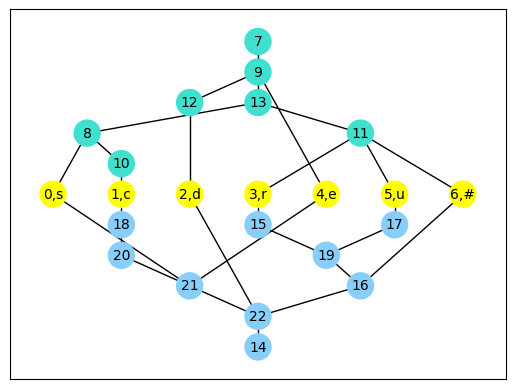

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

def Draw_shape(total_diamond_size , plain_text_set_size , Adjacency_list , root_of_upper_tree , root_of_lower_tree , Label) : 

    mn,mx,node_color = set_cord(total_diamond_size , plain_text_set_size , Adjacency_list , root_of_upper_tree , root_of_lower_tree)

    G = nx.Graph()

    nodes = []

    for i in range(total_diamond_size):
        nodes.append((i, {'pos' : ((mn[i]+mx[i])/2.0,-Height_of_nodes[i])}))

    # print(nodes)

    G.add_nodes_from(nodes)

    edges = Edges_of_whole_diamond_graph

    G.add_edges_from(edges)

    # Set positions of nodes
    pos = nx.get_node_attributes(G, 'pos')

    label = {}

    for node in range(total_diamond_size) : 
        if(node < plain_text_set_size) :
            label[node] = str(str(Label[node]) + "," +plain_text_set[node])
        else : 
            label[node] = Label[node]

    # print(label)

    nx.set_node_attributes(G, label, 'label')

    # Draw nodes and edges
    labels = nx.get_node_attributes(G, 'label')

    nx.draw_networkx_nodes(G, pos,node_color=node_color,node_size=350)

    nx.draw_networkx_labels(G, pos,labels,font_size=10)

    nx.draw_networkx_edges(G, pos, arrowsize=10)

    # Show the plot
    plt.show()

Draw_shape(total_diamond_size , plain_text_set_size , Adjacency_list , root_of_upper_tree , root_of_lower_tree,vec)
# [0, 9, 11, 7, 10, 12, 14, 4, 21, 15, 17, 16, 20, 21]

Now storing LCA for each plain text elments pair.

Now we will do this using as by storing leaf nodes in its subtree elements on each node(untill its turn).

In [39]:
def dfs_parent(node):
    parent = [0 for i in range(total_diamond_size)]

    def dfs(node,par):
        parent[node]=par
        if(node<plain_text_set_size):
            return;
        
        for chi in Adjacency_list[node]:
            if(chi==par):
                continue
            
            dfs(chi,node)

    dfs(node,-1)

    return parent

In [40]:
parents_of_upper_tree = dfs_parent(root_of_upper_tree)
parents_of_lower_tree = dfs_parent(root_of_lower_tree)

In [41]:
def dfs_lca(node):
    storing_lca_for_tree = [[0 for j in range(plain_text_set_size)] for i in range(plain_text_set_size)]
    leaf_nodes = [[] for i in range(total_diamond_size)]

    for i in range(plain_text_set_size):
        leaf_nodes[i].append(i)
        storing_lca_for_tree[i][i]=i

    def dfs(node,par):
        if(node<plain_text_set_size):
            return;
        
        for chi in Adjacency_list[node]:
            if(chi==par):
                continue
            dfs(chi,node)
            for node1 in leaf_nodes[node]:
                for node2 in leaf_nodes[chi]:
                    storing_lca_for_tree[node1][node2]=node
                    storing_lca_for_tree[node2][node1]=node

            for node2 in leaf_nodes[chi]:
                leaf_nodes[node].append(node2)

    dfs(node,-1)

    return storing_lca_for_tree

In [42]:
storing_lca_for_upper_tree = dfs_lca(root_of_upper_tree)
storing_lca_for_lower_tree = dfs_lca(root_of_lower_tree)
print(storing_lca_for_upper_tree)
print(storing_lca_for_lower_tree)

[[0, 8, 9, 13, 9, 13, 13], [8, 1, 9, 13, 9, 13, 13], [9, 9, 2, 9, 9, 9, 9], [13, 13, 9, 3, 9, 11, 11], [9, 9, 9, 9, 4, 9, 9], [13, 13, 9, 11, 9, 5, 11], [13, 13, 9, 11, 9, 11, 6]]
[[0, 21, 22, 22, 21, 22, 22], [21, 1, 22, 22, 21, 22, 22], [22, 22, 2, 22, 22, 22, 22], [22, 22, 22, 3, 22, 19, 16], [21, 21, 22, 22, 4, 22, 22], [22, 22, 22, 19, 22, 5, 16], [22, 22, 22, 16, 22, 16, 6]]


In [43]:
roots = [root_of_upper_tree,root_of_lower_tree]

**Now the Encryption part begins ~!>#$%@*&^**


---



In [44]:
text = "secure"  #This is the string which we are going to encrypt.

In [45]:
def create_cipher_text(str_real,perm):
   
    if(len(str_real)%2):
        str_real+=(plain_text_set[-1])
    
    # print(str_real)

    n=len(str_real)

    str=""

    for i in range(0,n,2):
        if(str_real[i]==str_real[i+1]):
            str+=('#'+str_real[i])
        else:
            str+=(str_real[i]+str_real[i+1])
    
    cipher_text = []

    for i in range(0,n,2):
        if(i == 0) :
            print("Random Permutation : " , perm) 
        Draw_shape(total_diamond_size , plain_text_set_size , Adjacency_list , root_of_upper_tree , root_of_lower_tree , copy.deepcopy(perm)) 
        # print(perm)
        cipher = [[[],[]],[[],[]]]
        
        lca=[storing_lca_for_upper_tree[mapping_elements[str[i]]][mapping_elements[str[i+1]]],storing_lca_for_lower_tree[mapping_elements[str[i]]][mapping_elements[str[i+1]]]]

        for ok1 in range(2):
            for ok2 in range(2):
                num = mapping_elements[str[i+ok1]]
                cipher[ok1][ok2].append(num)
                while(num!=lca[ok2]):
                    if(ok2):
                        num=parents_of_lower_tree[num]
                    else:
                        num=parents_of_upper_tree[num]
                    cipher[ok1][ok2].append(num)

        its_cipher = []
        for ok1 in range(2):
            for ok2 in range(2):
                if(ok2 % 2):
                    cipher[(ok2+ok1)%2][ok1].reverse()

                cipher[(ok2+ok1)%2][ok1].pop()
                its_cipher.extend(cipher[(ok2+ok1)%2][ok1])
            
        # its_cipher.append(random.choice([x for x in range(plain_text_set_size, total_diamond_size) if x != parents_of_lower_tree[its_cipher[-1]]]))

        # print(its_cipher)

        for i in range(len(its_cipher)):
            its_cipher[i] = perm[its_cipher[i]]

        # print(its_cipher)
        cipher_text.extend(its_cipher)

        a = ((perm[roots[0]] + perm[lca[0]])%(total_diamond_size-1))+1
        b = (perm[roots[1]] + perm[lca[1]])%total_diamond_size

        if(i != 0) :
            print("a , b : " , a , b)
            print("x , ax + b : " , perm[0] , (a*perm[i] + b)%total_diamond_size)

        another = []

        for i in range(total_diamond_size):
            another.append((a*perm[i] + b)%total_diamond_size)

        perm.clear()
        perm.extend(another)
    
    return cipher_text

Random Permutation :  [19, 10, 11, 1, 15, 14, 13, 3, 7, 5, 4, 2, 20, 18, 6, 0, 17, 9, 22, 12, 21, 16, 8]


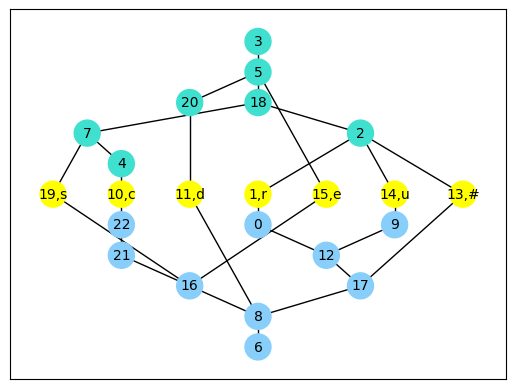

a , b :  9 22
x , ax + b :  19 10


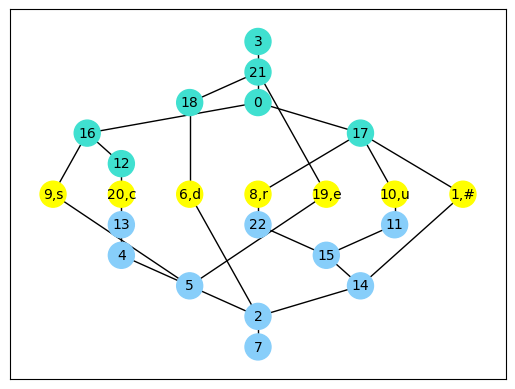

a , b :  4 9
x , ax + b :  9 12


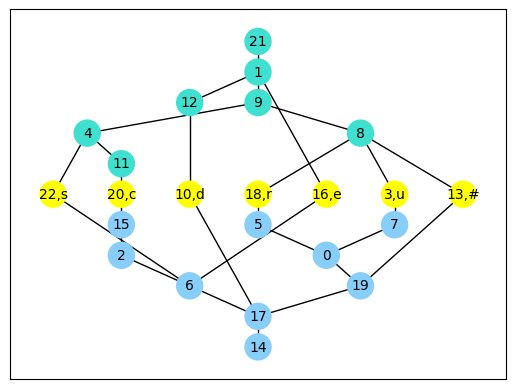

a , b :  1 8
x , ax + b :  22 9
[19, 7, 18, 5, 15, 16, 20, 12, 16, 0, 17, 10, 11, 15, 14, 2, 5, 4, 13, 18, 8, 9, 1, 16, 6, 17, 19, 0, 5]


In [46]:
perm=copy.deepcopy(vec)
random.shuffle(perm)

cipher_text = create_cipher_text(text,copy.deepcopy(perm))
print(cipher_text)

**Now the Decryption part begins**

As per algorithm for decryption only 2 things are to be known

1) Initial Tree

2) Initial Permutation

---



In [47]:
def decrypt_cipher_text(perm_,cipher_text):
    ini_perm = copy.deepcopy(perm_)
    
    order = [0 for i in range(total_diamond_size)]

    len_of_cipher_text = len(cipher_text)
    ppos=0

    loading = ""

    while(ppos<len_of_cipher_text):
        for i in range(total_diamond_size):
            order[ini_perm[i]]=i

        # print(order)

        fir = order[cipher_text[ppos]]
        last_element=parents_of_lower_tree[fir]
        sec = 0

        while(1):
            ppos+=1
            if(order[cipher_text[ppos]]<plain_text_set_size):
                sec = order[cipher_text[ppos]]
                break
        
        while(order[cipher_text[ppos]]!=last_element):
            ppos+=1

        ppos+=1

        # print([fir,sec])

        lca = [storing_lca_for_upper_tree[fir][sec],storing_lca_for_lower_tree[fir][sec]]

        loading+=plain_text_set[fir]
        loading+=plain_text_set[sec]

        # print(loading)


        a = ((ini_perm[roots[0]] + ini_perm[lca[0]])%(total_diamond_size-1)) + 1
        b = (ini_perm[roots[1]] + ini_perm[lca[1]])%total_diamond_size

        # print("ab",a,b)
        another_perm = []

        for i in range(total_diamond_size):
            another_perm.append((a*ini_perm[i] + b)%total_diamond_size)

        ini_perm.clear()
        ini_perm.extend(another_perm)
        # print(ini_perm)
    
    return loading

In [48]:
get_text = decrypt_cipher_text(copy.deepcopy(perm),cipher_text)

main_text = ""
n=len(get_text)

for i in range(0,n,2):
    if(get_text[i]=='#'):
        main_text+=(get_text[i+1]+get_text[i+1])
    else:
        main_text+=(get_text[i]+get_text[i+1])

if(main_text[-1]=='#'):
    main_text = main_text[:-1]

print(main_text)

secure
